In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WB_ESG_EN_ATM_CO2E_PC_WIDEF.csv')

In [3]:
df = df.drop(columns=[
    'INDICATOR',
    'INDICATOR_LABEL',
    'UNIT_MEASURE',
    'UNIT_MEASURE_LABEL',
    'DATABASE_ID',
    'DATABASE_ID_LABEL',
    'UNIT_MULT',
    'UNIT_MULT_LABEL',
    'OBS_STATUS',
    'OBS_STATUS_LABEL',
    'OBS_CONF',
    'OBS_CONF_LABEL',
    'FREQ',
    'FREQ_LABEL',
    'REF_AREA'
])

In [4]:
df = df.rename(columns={'REF_AREA_LABEL': 'Country'})

In [5]:
years = [str(year) for year in range(1990, 2021)]
df_tidy = df.melt(
    id_vars='Country', 
    value_vars=years,
    var_name='Year'
)

In [6]:
nations = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]
df_filtered = df_tidy.query("Country in @nations").reset_index(drop=True)

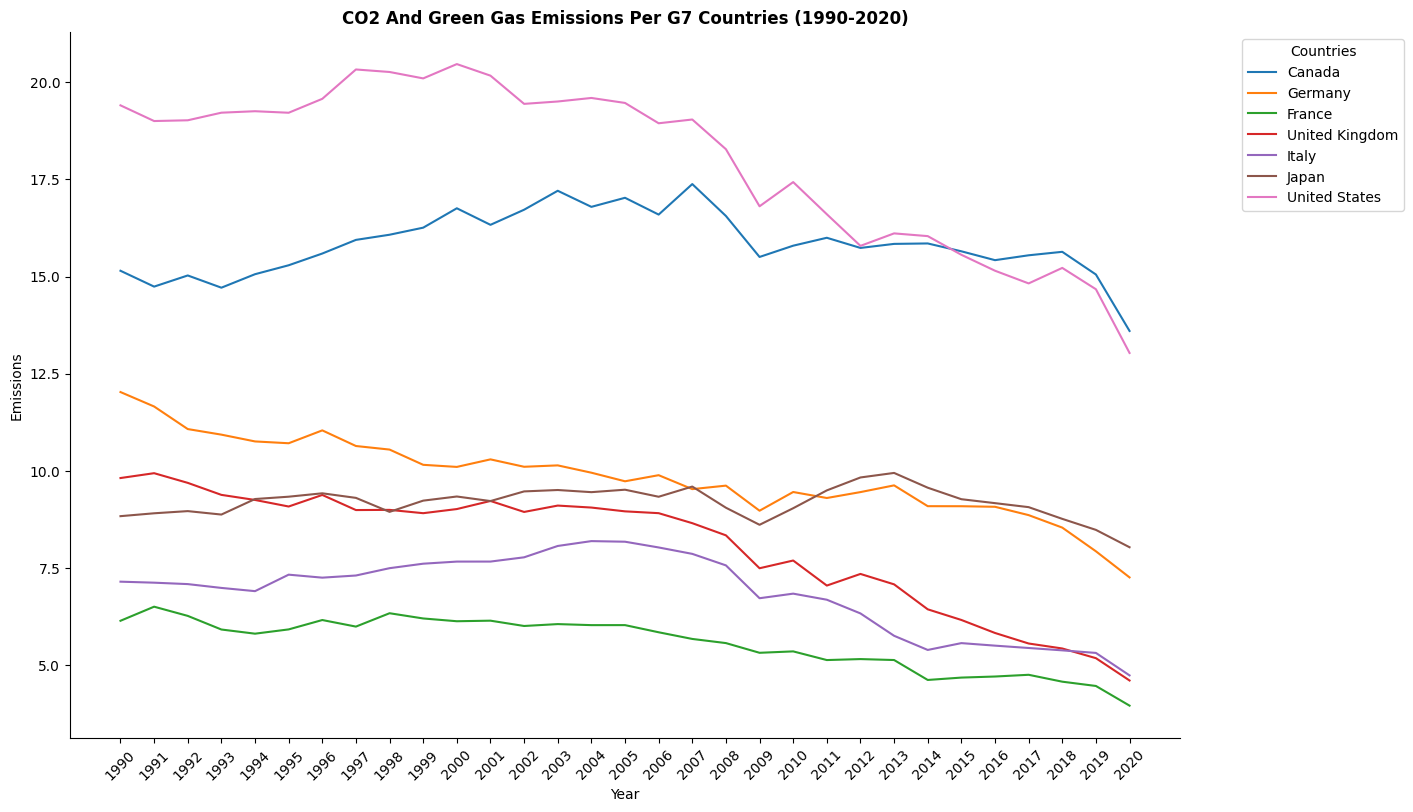

In [7]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_filtered, x='Year', y='value', hue='Country', markers='o')

sns.despine()
plt.xticks(rotation=45)
plt.ylabel('Emissions')
plt.tight_layout()
plt.title('CO2 And Green Gas Emissions Per G7 Countries (1990-2020)', fontweight='bold')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()